In [1]:
# Importing necessary libraries

from google.colab import files
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Uploading the first file and converting it into a dataframe

uploaded = files.upload()
df_1 = pd.read_excel('Country-Code.xlsx')
df_1.head()

Saving Country-Code.xlsx to Country-Code.xlsx


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [3]:
# Importing the second data and creating the data frame

url = 'https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv'
df_2 = pd.read_csv(url, encoding='ISO-8859-1')
df_2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Merging two dataframes into one

zomato_df = pd.merge(df_1, df_2)
zomato_df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [5]:
# Shape of the data frame, 9551 shows number of rows and 22 shows number of columns

zomato_df.shape

(9551, 22)

In [6]:
# Unique values in each column

zomato_df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [7]:
# Unique values in each column

zomato_df.nunique()

Country Code              15
Country                   15
Restaurant ID           9551
Restaurant Name         7446
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [8]:
# Statstical Analysis of the data frame

zomato_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [9]:
# Calcuating null values in the data

zomato_df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
# Replacing null values

zomato_df['Cuisines'].fillna(method='ffill', inplace=True)

zomato_df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

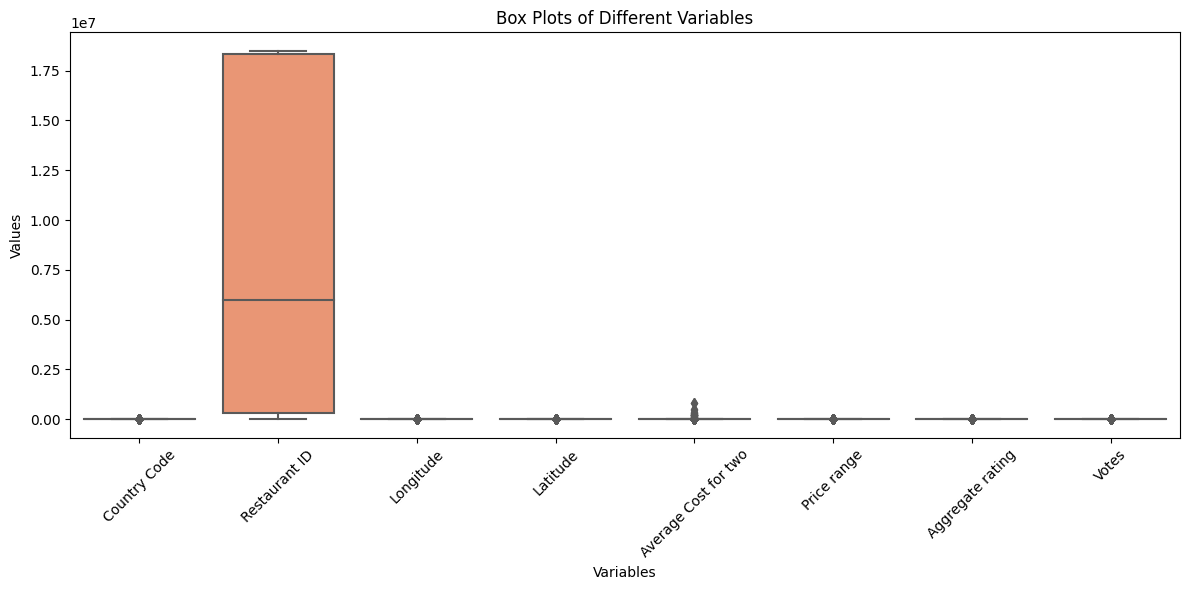

In [11]:
# Box plots for the dataframe

plt.figure(figsize=(12, 6))
sns.boxplot(data=zomato_df, orient='v', palette='Set2')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots of Different Variables')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

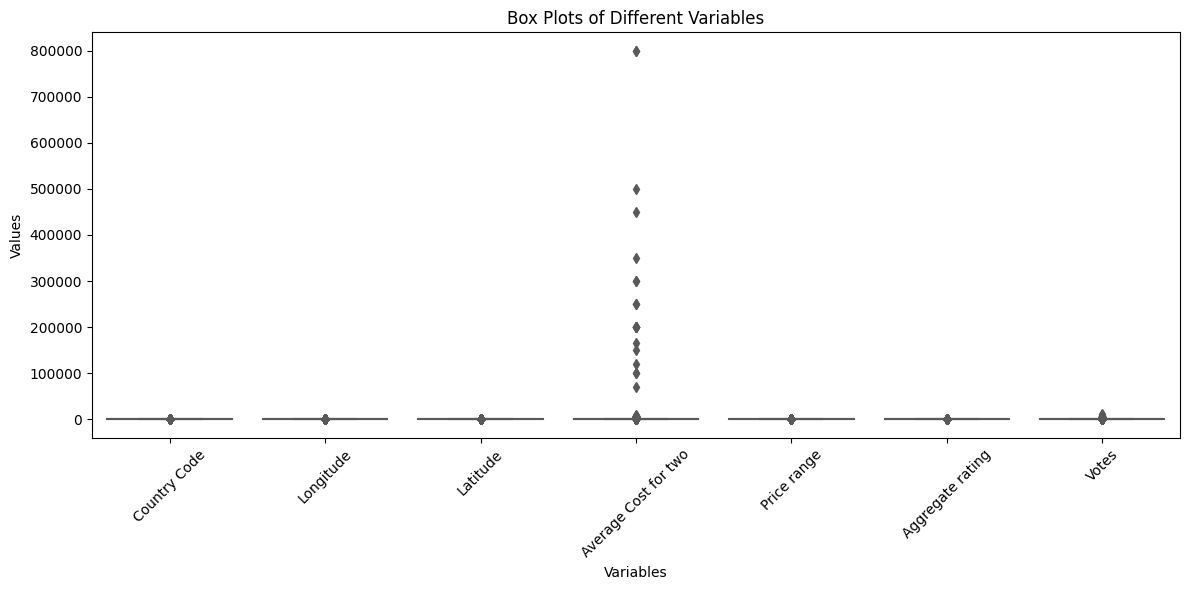

In [12]:
# Dropping Restaurant ID column as it has very varied datapoints

zomato_df.drop(['Restaurant ID'], axis=1, inplace = True)

# Again box plots for the dataframe

plt.figure(figsize=(12, 6))
sns.boxplot(data=zomato_df, orient='v', palette='Set2')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots of Different Variables')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [13]:
# Number of outliers in each column

count_outliers = lambda column: (column < column.quantile(0.25) - 1.5 * (column.quantile(0.75) - column.quantile(0.25))) | (column > column.quantile(0.75) + 1.5 * (column.quantile(0.75) - column.quantile(0.25)))

columns = []

for i in zomato_df:
  if zomato_df[i].dtypes == "int64":
    columns.append(i)

for column in columns:
    num_outliers = count_outliers(zomato_df[column]).sum()
    print(f"Column '{column}' has {num_outliers} outliers.")

Column 'Country Code' has 899 outliers.
Column 'Average Cost for two' has 853 outliers.
Column 'Price range' has 586 outliers.
Column 'Votes' has 1126 outliers.


In [14]:
# Rectifying outlier using Winsorizing method

lower_bound = zomato_df.quantile(0.25)
upper_bound = zomato_df.quantile(0.75)

# Apply Winsorizing to each column

for column in columns:
    zomato_df[column] = np.where(zomato_df[column] < lower_bound[column], lower_bound[column], zomato_df[column])
    zomato_df[column] = np.where(zomato_df[column] > upper_bound[column], upper_bound[column], zomato_df[column])

In [15]:
# Again checking outliers

for column in columns:
    num_outliers = count_outliers(zomato_df[column]).sum()
    print(f"Column '{column}' has {num_outliers} outliers.")

Column 'Country Code' has 0 outliers.
Column 'Average Cost for two' has 0 outliers.
Column 'Price range' has 0 outliers.
Column 'Votes' has 0 outliers.


In [16]:
# Dropping non-important columns

zomato_df.drop(['Country Code', 'Longitude', 'Latitude', 'Aggregate rating'], axis=1, inplace = True)

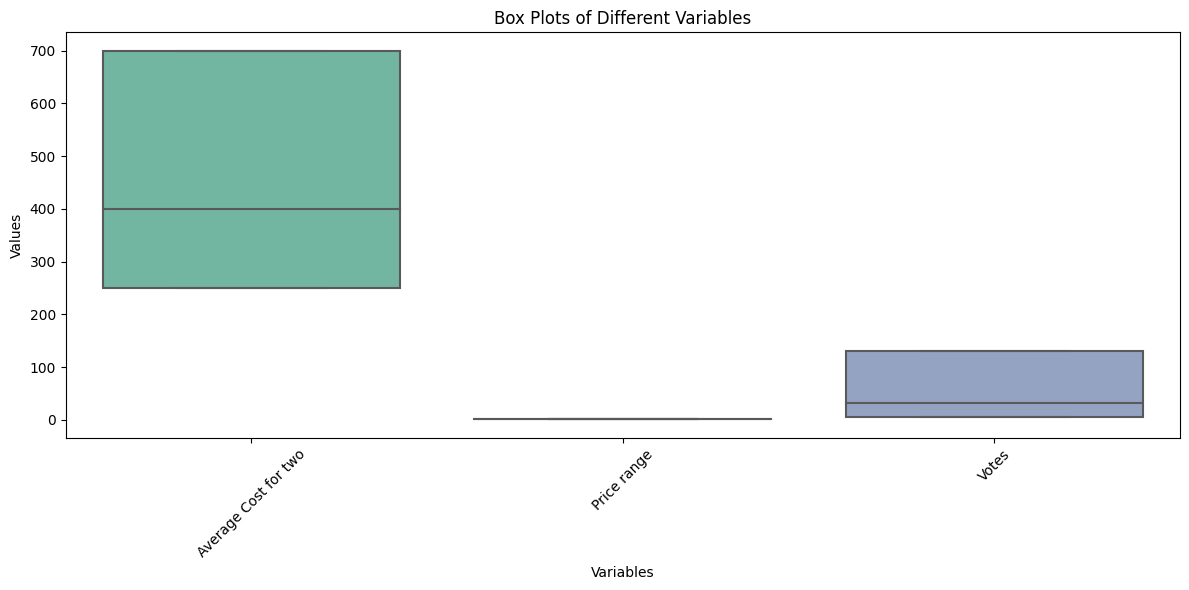

In [17]:
# Again box plots for the dataframe

plt.figure(figsize=(12, 6))
sns.boxplot(data=zomato_df, orient='v', palette='Set2')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plots of Different Variables')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Building the correlation matrix

corrs = zomato_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

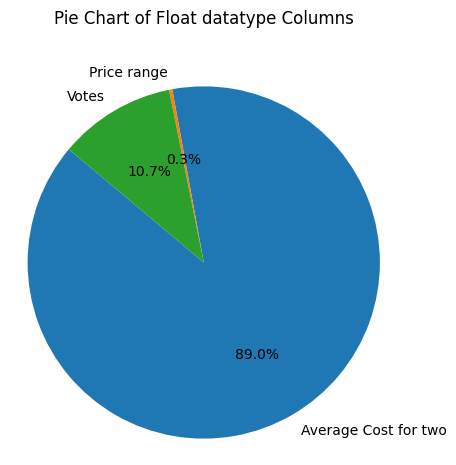

In [19]:
# Plotting pie chart of the dataframe

float_columns = zomato_df.select_dtypes(include=['float64'])
column_sums = float_columns.mean()

plt.figure(figsize=(5, 5))
plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Float datatype Columns', y=1.1)
plt.show()

In [20]:
# Dropping categorical columns with high number of levels or just 1

zomato_df.drop(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Switch to order menu', 'Votes'], axis=1, inplace = True)

In [21]:
# Copying the dataframe for building two models

zomato_df_2 = zomato_df.copy()
zomato_df_2.head()

,Country,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating color,Rating text
0,India,700.0,Indian Rupees(Rs.),No,No,No,2.0,Yellow,Good
1,India,700.0,Indian Rupees(Rs.),No,No,No,2.0,Yellow,Good
2,India,500.0,Indian Rupees(Rs.),No,No,No,2.0,Yellow,Good
3,India,400.0,Indian Rupees(Rs.),No,No,No,2.0,Green,Very Good
4,India,700.0,Indian Rupees(Rs.),No,No,No,2.0,Green,Very Good


# Model -1 : Predicting Average Cost for two

In [22]:
# Convert categorical columns into dummy variables

zomato_df = pd.get_dummies(zomato_df, columns=['Country', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text'], drop_first=True)

In [23]:
# Extracting the independent and dependent variables

X = zomato_df.drop(columns=['Average Cost for two'])
y = zomato_df['Average Cost for two']

In [25]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [26]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predictions

y_pred = regressor.predict(X_test)
y_pred

array([296.234375, 329.296875, 296.234375, ...,  73.828125, 329.296875,
       684.109375])

In [28]:
# Evaluation metrics for determining the model performance

print("Mean Squarerd Error :", mean_squared_error(y_test, y_pred))
print()
print("R Sqaure :", r2_score(y_test, y_pred))
print()
print("Model Coefficient :", regressor.coef_)
print()
print("Model Intercept :", regressor.intercept_)
print()
print("Explained Variance Score :", explained_variance_score(y_test, y_pred))
print()
print("Mean Absolute Error :", mean_absolute_error(y_test, y_pred))
print()
print("Median Absolute Error :", median_absolute_error(y_test, y_pred))

Mean Squarerd Error : 5582.6161816815065

R Sqaure : 0.8289258577125119

Model Coefficient : [ 2.64110669e+02 -2.30751857e+15 -2.42906239e+02  8.04424425e+14
  5.23612080e+13  2.14220500e+13  2.68096823e+14  1.34792418e+14
 -4.11157894e+01  1.10435247e+14 -1.73156666e+15  1.47476490e+14
  1.91888751e+14 -1.83844210e+15  1.37992904e+01  2.57561539e+15
  2.68096823e+14  7.62080726e+13 -5.36327601e+14  2.15735615e+14
  2.46674773e+14  2.10653893e+15  1.33304405e+14  1.57661576e+14
  1.99966348e+15  1.20620333e+14  9.06890821e+01  8.77225042e+00
  3.94126462e+00 -9.49420389e+14 -1.56904462e+14  1.32287068e+13
 -1.23675194e+14 -1.42281964e+15 -1.56904462e+14  1.26591517e+15
 -3.32292676e+13 -1.70133169e+14  7.92515927e+14]

Model Intercept : -111192361441058.8

Explained Variance Score : 0.8289530004506901

Mean Absolute Error : 60.71568386970173

Median Absolute Error : 57.296875


# Model -2 : Predicting Price range

In [29]:
# Convert categorical columns into dummy variables

zomato_df_2 = pd.get_dummies(zomato_df_2, columns=['Country', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text'], drop_first=True)

In [30]:
# Extracting the independent and dependent variables

X = zomato_df_2.drop('Price range', axis=1)
y = zomato_df_2['Price range']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [32]:
# Create a logistic regression model

lr = LogisticRegression(solver='newton-cg', C=100, penalty='l2', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='balanced', solver='newton-cg')

In [33]:
# Predictions

y_pred = lr.predict(X_test)
y_pred

array([1., 2., 2., ..., 2., 1., 2.])

In [34]:
# Calculate evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)

Accuracy: 0.9738356881214024
ROC AUC: 0.9964369917668154
